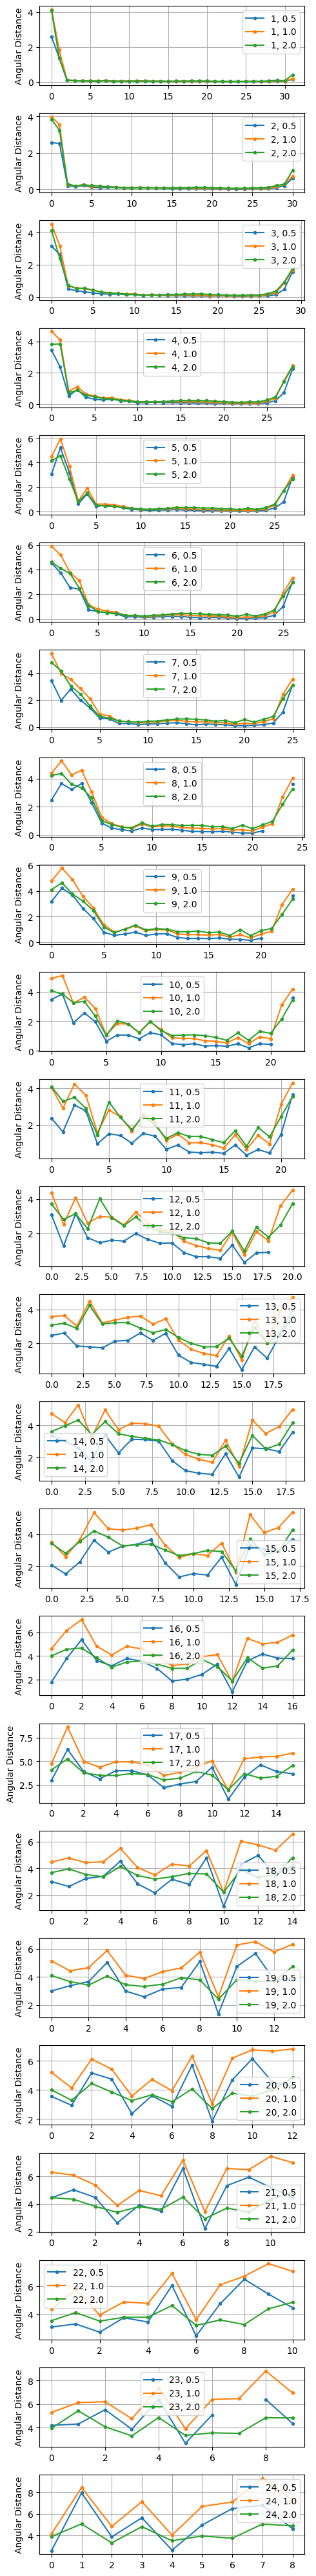

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

     
def file_reader(fname):
    f = open(fname)
    data = json.load(f)
    f.close()
    # with open(fname, 'r') as j:
    #     data = json.loads(j.read())
    last_token_sim = np.array(data)
    return last_token_sim

x_min_mistral = [26, 24, 23, 23, 23, 22, 21, 21, 20, 20, 19, 17, 17, 16, 13, 13, 11, 8, 8, 6, 6, 5, 4, 3]

model_name = "mistralai/Mistral-7B-v0.1"
out_dir = "skip_data/"
Temp_list = [0.5,1.0,2.0]

num_layers = 32
# step_list = np.arange(1,0.8*num_layers+1).astype(int)
colors = plt.cm.viridis(np.linspace(0,1,25))
x_min = []
y_mid = []


# print(len(similarity["1"]))
# mean_sim = []
plt.figure(figsize=(5,40))

x_min_list = {}
for Temp in Temp_list:
    x_min_list[f"{Temp}"] = []

for block_size in range(1,25):
# for block_size in range(24,0,-1):
    # print(block_size)
    # fname = out_dir+ f"l_{block_size}_output_c4_{model_name.split('/')[-1]}.json"
    # if os.path.exists(fname):
    #     similarity_list = file_reader(fname)
    #     y = np.arccos(similarity_list).mean(axis=1)
    #     plt.plot(np.arange(num_layers-block_size+1),y,".-", label=f"{block_size}") #,color = colors[block_size],
        
    # fname = out_dir+ f"l_{block_size}_tf_output_c4_{model_name.split('/')[-1]}.json"
    # fname = out_dir+ f"c_entropy_l_{block_size}_output_c4_{model_name.split('/')[-1]}.json"
    for Temp in Temp_list:
        fname = out_dir+ f"KL_T_{Temp:.1f}_l_{block_size}_output_c4_{model_name.split('/')[-1]}.json"
        if os.path.exists(fname):
            # plt.figure(figsize=(5,4))
            plt.subplot(24,1,block_size)
            similarity_list = file_reader(fname)
            # print(similarity_list.shape)
            # y = np.arccos(similarity_list).mean(axis=1)
            x = np.arange(num_layers-block_size+1)
            y = similarity_list.mean(axis=1)
            plt.plot(x,Temp * y,".-", label=f"{block_size}, {Temp:.1f}") #,color = colors[block_size],

            idx_min = np.argmin(y)
            x_min = x[idx_min]
            y_min = y[idx_min]
            x_min_list[f"{Temp}"].append(x_min)

            # plt.plot(x_min_mistral[block_size-1],y.min(),"k^")

            # fname = out_dir+ f"c_entropy_l_{block_size}_output_c4_{model_name.split('/')[-1]}.json"
            # similarity_list = file_reader(fname)
            # x2 = np.arange(num_layers-block_size+1)
            # y2 = similarity_list.mean(axis=1)
            # plt.plot(x,y2,".-", label=f"{block_size}") #,color = colors[block_size],

            # plt.xlabel("Layer Number")# (similarity btw in and out of [x,x+1,x+2])")
            plt.ylabel("Angular Distance")
            # plt.title(f"{model_name.split('/')[-1]}", fontsize= 10)
            plt.grid()
            # plt.xlim(15.5,27.5)
            # plt.ylim(0.05,0.25)
            # plt.legend(handlelength=1)#bbox_to_anchor=(1.2, 1.0))
            plt.tight_layout()
            plt.legend()
            # plt.savefig(f"c4_{model_name.split('/')[-1]}.png")
            # plt.show()




In [65]:
print(x_min_list)

[5, 0]


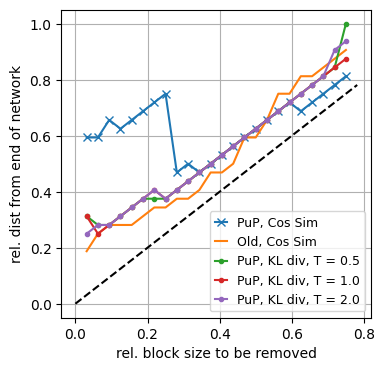

In [126]:
x_plot = np.arange(0,26)/32
x_layer_io_mistral = [26, 24, 23, 23, 23, 22, 21, 21, 20, 20, 19, 17, 17, 16, 13, 13, 11, 8, 8, 6, 6, 5, 4, 3]
x_model_io_mistral = [13, 13, 11, 12, 11, 10, 9, 8, 17, 16, 17, 16, 15, 14, 13, 12, 11, 10, 9, 10, 9, 8, 7, 6]

plt.figure(figsize=(4,4))

plt.plot(np.arange(1,25)/32,1-np.array(x_model_io_mistral)/32,"x-", label="PuP, Cos Sim")
plt.plot(np.arange(1,25)/32,1-np.array(x_layer_io_mistral)/32,"-", label="Old, Cos Sim")

for Temp in Temp_list:
    plt.plot(np.arange(1,25)/32,1-np.array(x_min_list[f"{Temp}"])/32,".-",label=f"PuP, KL div, T = {Temp:.1f}")
plt.plot(x_plot,x_plot,"k--")
plt.legend(handlelength=1,fontsize=9)
plt.ylabel("rel. dist from end of network")
plt.xlabel("rel. block size to be removed")
plt.grid()
plt.show()


Text(0.5, 0, 'rel. block size to be removed')

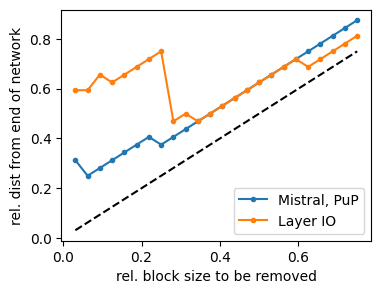

In [41]:
x_plot = np.arange(1,25)/32
x_io_layer_mistral = [13, 13, 11, 12, 11, 10, 9, 8, 17, 16, 17, 16, 15, 14, 13, 12, 11, 10, 9, 10, 9, 8, 7, 6]

x_min_mistral = [22, 24, 23, 22, 21, 20, 19, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4]

plt.figure(figsize=(4,3))
# plt.plot(np.arange(1,25)/32,1-np.array(x_min_qwen)/32,"x-",label="Qwen-7B, PuP")
plt.plot(np.arange(1,25)/32,1-np.array(x_min_mistral)/32,".-",label="Mistral, PuP")
plt.plot(np.arange(1,25)/32,1-np.array(x_io_layer_mistral)/32,".-", label="Layer IO")
plt.plot(x_plot,x_plot,"k--")
plt.legend()
plt.ylabel("rel. dist from end of network")
plt.xlabel("rel. block size to be removed")
